In [17]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [18]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [29]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 35
postChar = 4

In [30]:
### Main Execution
for file_name in getListOfFiles(fileRE,preChar,postChar):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)

    y.append(getAve(row))
    err.append(np.std(row.astype(np.float)))

../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#1.csv ['39' '37' '30' '26' '34' '27' '117' '27' '26' '32' '33']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#2.csv ['30' '26' '26' '113' '31' '31' '35' '119' '29' '28' '36']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#3.csv ['28' '32' '34' '27' '27' '36' '31' '31' '36' '31' '35']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#4.csv ['28' '32' '31' '38' '32' '44' '34' '33' '41' '34' '43']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#5.csv ['34' '34' '35' '39' '40' '32' '39' '40' '42' '38' '43']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#6.csv ['33' '41' '36' '35' '42' '42' '36' '38' '37' '45' '47']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-300clients-sep-trial#7.csv ['43' '46' '120' '44' '44' '48' '44' '47' '40' '47' '48']
../experiments/Exp1-aws-ganache-done/sep/Exp1-aws1-

[38.90909091 45.81818182 31.63636364 35.45454545 37.81818182 39.27272727
 51.90909091 46.         33.23333333 44.96666667 50.03333333 62.3
 57.03333333 51.2        42.46666667 36.4        36.83333333 41.16666667
 49.9        65.56666667]
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197

ValueError: shape mismatch: objects cannot be broadcast to a single shape

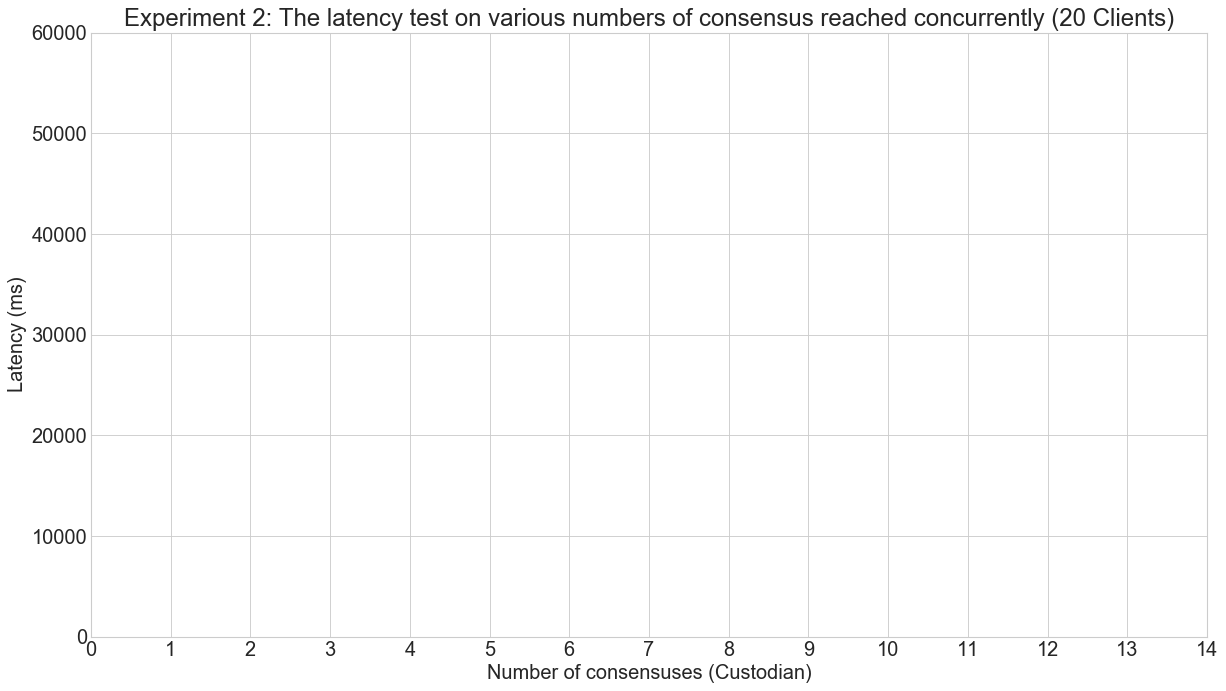

In [31]:
x = np.arange(10,301,1)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0, 70000, step=10000))
plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Number of voters (Clients)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 2: The latency test on various numbers of consensus reached concurrently (20 Clients)")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");